# Final Project #

## Neighbourhood selection for a new office in a new city to expand the business ##

### Installing required Libraries ###

In [1]:
# Libraries for handling data
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Libraries for handling json datafiles
import json

#Libraries for Gepgraphical identification of location
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

# Library for using Kmeans method for clustering
from sklearn.cluster import KMeans

# Libraries to handle requests
import requests
from pandas.io.json import json_normalize

# Libraries to plot and visualize locations on maps and also plotting other kmeans related data
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# Liraries to import data from website
import seaborn as sns
from bs4 import BeautifulSoup as BS

print('All DONE')

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1962
  - defaults/noarch::ibm-wsrt-py37main-main==custom=1962
done

# All requested packages already installed.

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::pytorch==1.8.0=cpu_py37hafa7651_0
  - defaults/noarch::ibm-wsrt-py37main-keep==0.0.0=1962
  - defaults/noarch::ibm-wsrt-py37main-main==custom=1962
done

# All requested packages already installed.

All DONE


### Getting the current address from User ###

In [2]:
# Entering the current office address
SF_add=input ("Please enter current office address")

# Getting the Lat-Lon of the office
geolocator = Nominatim(user_agent="USA_explorer")
SF_location = geolocator.geocode(SF_add)
SF_latitude = SF_location.latitude
SF_longitude = SF_location.longitude
print('The geograpical coordinate are {}, {}.'.format(SF_latitude, SF_longitude))

Please enter current office address353 Sacramento St, San Francisco, CA 94111, United States
The geograpical coordinate are 37.794163178571424, -122.39926271428571.


### Getting the Neighbourhoods in New York City ###

In [3]:
# Getting New York Neighbourhoods from the below mentioned Website
URL = "https://www.baruch.cuny.edu/nycdata/population-geography/neighborhoods.htm"
r = requests.get(URL, verify = False)

soup = BS(r.text, "html.parser")
data = soup.find_all("tr")

start_index = 0
for i in range (len(data)):
    td = data[i].find_all("td")
    for j in range (len(td)):
        if td[j].text == "Brooklyn":
            start_index = i
            break
    if start_index != 0:
        break
        
end_index = 0
for i in range (len(data)-1,0,-1):
    td = data[i].find_all("td")
    for j in range (len(td)):
        if td[j].text == "Woodside":
            end_index = i
            break
    if end_index != 0:
        break
        
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
for i in range (start_index,end_index+1):
    td = data[i].find_all("td")
    list1.append(td[1].text)
    list2.append(td[2].text)
    list3.append(td[3].text)
    list4.append(td[4].text)
    list5.append(td[5].text) 
    
final = []
final.append(list1)
final.append(list2)
final.append(list3)
final.append(list4)
final.append(list5)

df = pd.DataFrame(final)

df = df.transpose()


final_df = pd.DataFrame(columns=['Borough','Neighbourhood'])

for i in range (5):
    d = {}
    d = {'Borough':df[i][0]}
    for j in range (1,len(df)):
        if df[i][j]=='\xa0':
            break
        else:
            d['Neighbourhood'] = df[i][j]
            final_df = final_df.append(d,ignore_index=True)
        
# Adding Latitude and Longitude of each Neighbourhoods
        
final_df[['Latitude','Longitude']]=""

for i in range(len(final_df)):
    nyadd=str(final_df['Neighbourhood'][i])+', '+str(final_df['Borough'][i])+', New York'
    
    geolocator = Nominatim(user_agent="USA_explorer")
    location = geolocator.geocode(nyadd)
    try:
        latitude = location.latitude
        longitude = location.longitude
    except:
        latitude=1000 # For those neighbourhoods whose latitude and longitude could not be fetched
        longitude=1000
    final_df['Latitude'][i]=latitude
    final_df['Longitude'][i]=longitude

final_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/urllib3/connectionpool.py:1020: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.baruch.cuny.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


,Borough,Neighbourhood,Latitude,Longitude
0,Brooklyn,Bath Beach,40.60185,-74.000501
1,Brooklyn,Bay Ridge,40.633993,-74.014584
2,Brooklyn,Bedford Stuyvesant,40.683436,-73.941249
3,Brooklyn,Bensonhurst,40.604977,-73.993406
4,Brooklyn,Bergen Beach,40.620382,-73.906803
5,Brooklyn,Boerum Hill,40.685626,-73.984171
6,Brooklyn,Borough Park,40.633993,-73.996806
7,Brooklyn,Brighton Beach,40.579644,-73.961111
8,Brooklyn,Broadway Junction,40.679192,-73.903354
9,Brooklyn,Brooklyn Heights,40.696085,-73.995028


### Cleaning the dataset for NY Neighbourhoods ###

In [4]:
# Removing the neighbourhoods whose latitude and longitude could not be fetched
final_df=final_df[final_df.Latitude!=1000]
final_df.reset_index(inplace=True)
final_df.drop('index',axis=1,inplace=True)
final_df

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Borough,Neighbourhood,Latitude,Longitude
0,Brooklyn,Bath Beach,40.60185,-74.000501
1,Brooklyn,Bay Ridge,40.633993,-74.014584
2,Brooklyn,Bedford Stuyvesant,40.683436,-73.941249
3,Brooklyn,Bensonhurst,40.604977,-73.993406
4,Brooklyn,Bergen Beach,40.620382,-73.906803
5,Brooklyn,Boerum Hill,40.685626,-73.984171
6,Brooklyn,Borough Park,40.633993,-73.996806
7,Brooklyn,Brighton Beach,40.579644,-73.961111
8,Brooklyn,Broadway Junction,40.679192,-73.903354
9,Brooklyn,Brooklyn Heights,40.696085,-73.995028


### Adding San Francisco Add in the Dataframe for clustering ###

In [5]:
# Current office Neighbourhood is added to the list so that during the clustering it can form clusters with NY neighbourhoods which are similar to each other
SFadd={'Borough': 'Financial District, SF','Neighbourhood':'Financial District','Latitude':SF_latitude,'Longitude':SF_longitude}
final_df=final_df.append(SFadd,ignore_index=True)
final_df

,Borough,Neighbourhood,Latitude,Longitude
0,Brooklyn,Bath Beach,40.60185,-74.000501
1,Brooklyn,Bay Ridge,40.633993,-74.014584
2,Brooklyn,Bedford Stuyvesant,40.683436,-73.941249
3,Brooklyn,Bensonhurst,40.604977,-73.993406
4,Brooklyn,Bergen Beach,40.620382,-73.906803
5,Brooklyn,Boerum Hill,40.685626,-73.984171
6,Brooklyn,Borough Park,40.633993,-73.996806
7,Brooklyn,Brighton Beach,40.579644,-73.961111
8,Brooklyn,Broadway Junction,40.679192,-73.903354
9,Brooklyn,Brooklyn Heights,40.696085,-73.995028


### Clustering the neighbourhoods fo new york including the neighbourhood of San Francisco ###

#### Defining Foursquare credentials ####

<!--
CLIENT_ID = 'XJ22MQ024ZAFRRIUGZT5OLCNREGHZX3QXFAVWBCUF1J3TJCC'
CLIENT_SECRET = 'ODFUXNWDXKQKORUNERLTHPXKOO2NEQMVGXWP34H3RV4XYYWX'
VERSION = '20180605'
LIMIT = 100
-->

#### Function to get the venues from all neighbourhoods ####

In [7]:
def getNearbyVenues(borough, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for borough, name, lat, lng in zip(borough, names, latitudes, longitudes):
            
        # API request URL creation
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making requests for the URL
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Returning only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
# Getting the venues for each neighbourhoods
NewYork_venues = getNearbyVenues(borough=final_df['Borough'],names=final_df['Neighbourhood'],
                                   latitudes=final_df['Latitude'],
                                   longitudes=final_df['Longitude']
                                  )

In [9]:
NewYork_venues=NewYork_venues[NewYork_venues['Venue Category']!='Neighborhood'] # Code adjusted to remove Neighborhood as one of the venue categories
NewYork_venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Brooklyn,Bath Beach,40.60185,-74.000501,King's Kitchen,40.603844,-73.996960,Cantonese Restaurant
1,Brooklyn,Bath Beach,40.60185,-74.000501,Lutzina Bar&Lounge,40.600807,-74.000578,Hookah Bar
2,Brooklyn,Bath Beach,40.60185,-74.000501,Lenny's Pizza,40.604908,-73.998713,Pizza Place
3,Brooklyn,Bath Beach,40.60185,-74.000501,Planet Fitness,40.604567,-73.997861,Gym / Fitness Center
4,Brooklyn,Bath Beach,40.60185,-74.000501,Grotta Azzurra,40.603611,-73.995381,Pizza Place


In [10]:
# Converting venue cateories to dummy variables / Catergorical data for modelling
NY_onehot=pd.get_dummies(data=NewYork_venues[['Borough','Neighborhood','Venue Category']],columns=['Venue Category'],drop_first=True,prefix="", prefix_sep="")
NY_onehot.head()

,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Ven

####  Group rows by boroughs and neighborhood and by taking the mean of the frequency of occurrence of each category ####

In [11]:
# Getting scores for each of the categories which will be used to determine the similarity between any two neighbourhoods
NY_grouped = NY_onehot.groupby(['Borough','Neighborhood']).mean().reset_index()
NY_grouped.head()

,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Ven

In [12]:
# Function to the most common venues from a particular Neighbourhood 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [13]:
num_top_venues = 10 # selecting top 10 venues

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Borough','Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# new dataframe to hold the top 10 venues for each of the neighbourhoods
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough']=NY_grouped['Borough']
neighborhoods_venues_sorted['Neighborhood'] = NY_grouped['Neighborhood']

# calling the function to get the top 10 venues for each neighbourhood
for ind in np.arange(NY_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(NY_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Allerton,Bakery,Sandwich Place,Discount Store,Donut Shop,Pharmacy,Fast Food Restaurant,Pizza Place,Trail,Bank,Bar
1,Bronx,Bathgate,Restaurant,Bus Station,Donut Shop,Supermarket,Spanish Restaurant,Pharmacy,Pizza Place,Lounge,School,Sandwich Place
2,Bronx,Baychester,Pharmacy,Print Shop,Deli / Bodega,Donut Shop,Pizza Place,Historic Site,Playground,Chinese Restaurant,Grocery Store,Construction & Landscaping
3,Bronx,Bedford Park,Chinese Restaurant,Diner,Mexican Restaurant,Pizza Place,Deli / Bodega,Sandwich Place,Fried Chicken Joint,Baseball Field,Train Station,Grocery Store
4,Bronx,Belmont,Italian Restaurant,Pizza Place,Bakery,Deli / Bodega,Dessert Shop,Fish Market,Food & Drink Shop,Donut Shop,Pharmacy,Chinese Restaurant


#### Number of Clusters Determination (k-value)

In [14]:
# set number of clusters

K=range(1,50)


NY_grouped_clustering = NY_grouped.drop(['Borough','Neighborhood'], 1)
WCSS=[] # Model performance indicator --- within cluster sum of squares

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(NY_grouped_clustering)
    WCSS.append(kmeans.inertia_)
    
print (WCSS)


[30.364083499853304, 28.931798333796863, 27.75231308829518, 26.726744971794094, 25.484556259485668, 24.89657642972803, 24.26292924708035, 23.5671033770635, 22.93354387471155, 22.44873164669437, 21.480422088473745, 21.54730028075086, 20.88115453859288, 20.47409786712654, 20.237149913341852, 20.000177551173145, 19.700349568583995, 19.238624582414733, 19.231948040113704, 19.108944141074318, 18.868866629138864, 18.178032886482573, 18.36085718394965, 17.700229201689023, 17.516415613888444, 17.402276241067074, 17.134540354146985, 16.743163498759355, 16.426871902704324, 16.29628425134416, 16.335172865278142, 15.872679229180273, 15.947543958719317, 15.31646618726706, 15.539046432135004, 15.149368511351636, 14.96101933009104, 14.910973846282348, 14.582025915063507, 14.24124022112134, 14.25176029118952, 13.921388361413932, 13.816747418871069, 13.748171591214486, 13.402435524438738, 13.324471626291345, 13.182979332746914, 13.126669548634807, 13.011137393386925]


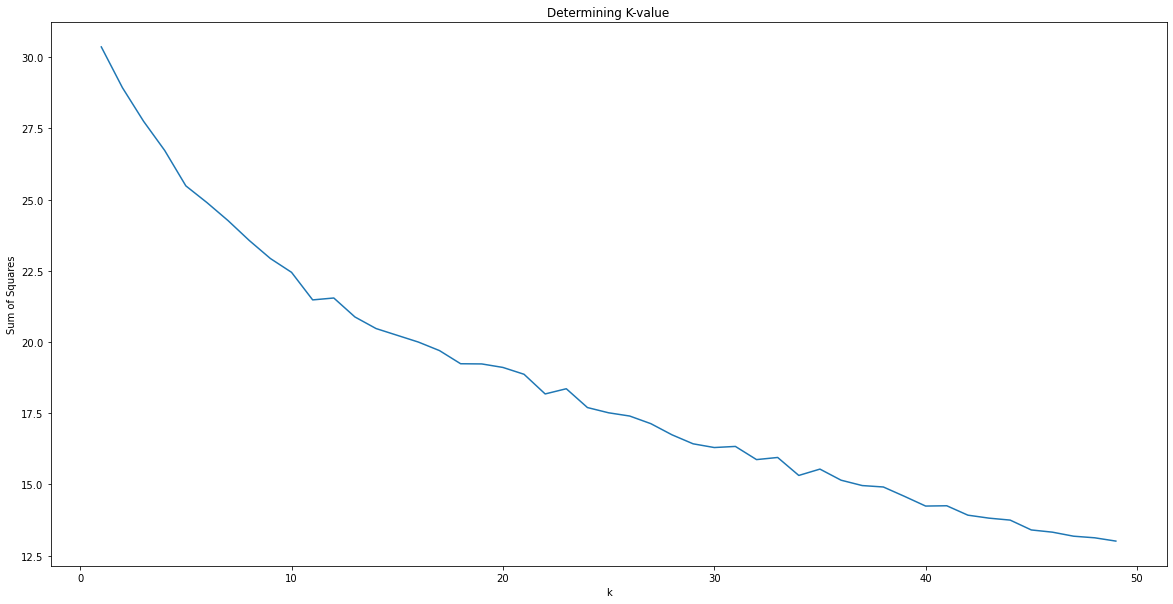

In [15]:
# Plotting WCSS to determine the optimal K-value for K-means clustering
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(K,WCSS)
plt.xlabel("k")
plt.ylabel("Sum of Squares")
plt.title("Determining K-value")
plt.show()

#### As per the above diagram, the optimal K-value seems to 12

In [16]:
# Cluster formation based on value of k=12
k=12
kmeans = KMeans(n_clusters=k, random_state=0).fit(NY_grouped_clustering)

In [17]:
# adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NY_clustered = final_df

# Adding latitude/longitude for each neighborhood with the cluster labels
NY_clustered = NY_clustered.merge(neighborhoods_venues_sorted.set_index(['Borough','Neighborhood']), left_on=['Borough','Neighbourhood'],right_on=['Borough','Neighborhood'])

NY_clustered.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brooklyn,Bath Beach,40.60185,-74.000501,4,Bank,Pizza Place,Chinese Restaurant,Supplement Shop,Japanese Restaurant,Italian Restaurant,Hookah Bar,Middle Eastern Restaurant,Tea Room,Cantonese Restaurant
1,Brooklyn,Bay Ridge,40.633993,-74.014584,1,Chinese Restaurant,Dessert Shop,Seafood Restaurant,Noodle House,Bar,Malay Restaurant,Hotpot Restaurant,Tennis Court,Park,Vietnamese Restaurant
2,Brooklyn,Bedford Stuyvesant,40.683436,-73.941249,1,Coffee Shop,Café,Pizza Place,Bar,Deli / Bodega,Playground,Cosmetics Shop,Southern / Soul Food Restaurant,Fried Chicken Joint,Cocktail Bar
3,Brooklyn,Bensonhurst,40.604977,-73.993406,4,Chinese Restaurant,Bank,Bakery,Pizza Place,Mobile Phone Shop,Cantonese Restaurant,Japanese Restaurant,Supplement Shop,Fast Food Restaurant,Shoe Store
4,Brooklyn,Bergen Beach,40.620382,-73.906803,4,Japanese Restaurant,Liquor Store,Donut Shop,Plaza,Pizza Place,Chinese Restaurant,Peruvian Restaurant,Food,Bus Station,Supermarket


#### Visualizing Clusters

In [18]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NY_clustered['Latitude'], NY_clustered['Longitude'], NY_clustered['Neighbourhood'], NY_clustered['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Searching the our current office cluster

In [19]:
NY_clustered.loc[NY_clustered['Borough'] == "Financial District, SF"]

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
315,"Financial District, SF",Financial District,37.794163,-122.399263,1,Coffee Shop,Gym,Japanese Restaurant,Men's Store,Food Truck,Sushi Restaurant,New American Restaurant,Park,Restaurant,Cocktail Bar


In [20]:
Cluster_Label=NY_clustered.loc[NY_clustered['Borough'] == "Financial District, SF",'Cluster Labels'].item()
print(Cluster_Label)

1


In [21]:
# Extracting all the neighbourhoods falling under the cluster 1 - same as that of our office
Cluster0=NY_clustered[NY_clustered['Cluster Labels']==Cluster_Label]
Cluster0.shape

(136, 15)

#### Our Office is clustered with 136 Nieghbourhoods of New York City

#### Identifying the neighbourhoods which are closest to our office within the cluster 1

In [22]:
NY1_grouped = NY_grouped

# Adding cluster labels to our original dataframe on which the Kmeans clustering was done
NY1_grouped = NY1_grouped.merge(neighborhoods_venues_sorted[['Borough','Neighborhood','Cluster Labels']].set_index(['Borough','Neighborhood']), left_on=['Borough','Neighborhood'],right_on=['Borough','Neighborhood'])
NY1_grouped.head()

,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Ven

In [23]:
# Extracting data for the neighbourhoods which has the same cluster as that of our office
SF_cluster=NY1_grouped[NY1_grouped['Cluster Labels']==Cluster_Label]
SF_cluster.shape

(136, 450)

In [24]:
# Preparing the revised dataframe for reclustering to identify the neighbourhood which most similar to our current neighbourhod
SF_grouped_clustering = SF_cluster.drop(['Borough','Neighborhood','Cluster Labels'], 1)

In [25]:
# Determining which neighbourhood is most similar to our office's neighbourhood by increasing the K value. Using K value in this manner is indirect way to calculate the distance between the neighbourhoods from a particular neighbourhood
k=75

# Kmeans clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(SF_grouped_clustering)

In [26]:
# Inserting the revised clusters in the extracted dataframe
SF1_cluster=SF_cluster
SF1_cluster.drop('Cluster Labels',inplace=True,axis=1)
SF1_cluster.insert(0, 'Cluster Labels', kmeans.labels_)
SF1_cluster

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Cluster Labels,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music 

In [27]:
# Identifying the new cluster label
SF1_cluster[SF1_cluster['Borough']=='Financial District, SF']

,Cluster Labels,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music 

In [28]:
# Extracting the details of the new cluster (=66)
Cluster_Label1=SF1_cluster.loc[SF1_cluster['Borough'] == "Financial District, SF",'Cluster Labels'].item()
SF1_cluster[SF1_cluster['Cluster Labels']==Cluster_Label1]

,Cluster Labels,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music 

#### The above neighbourhoods as most closest to our office neighbourhood. Our new office can be opened in any of these 5 locations

#### Finalizing the output with all the relevant data

In [29]:
SF2_cluster=SF1_cluster[SF1_cluster['Cluster Labels']==Cluster_Label1]
SF2_cluster.drop("Cluster Labels",inplace=True,axis=1)
SF2_cluster

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Borough,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Food Court,Airport Lounge,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Churrascaria,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Ven

In [30]:
columns1 = ['Borough','Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns1.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns1.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Final_venues_sorted = pd.DataFrame(columns=columns1)
Final_venues_sorted['Borough']=SF2_cluster['Borough']
Final_venues_sorted['Neighborhood'] = SF2_cluster['Neighborhood']

for ind in np.arange(SF2_cluster.shape[0]):
    Final_venues_sorted.iloc[ind, 2:] = return_most_common_venues(SF2_cluster.iloc[ind, :], num_top_venues)

Final_venues_sorted

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
82,Brooklyn,East Williamsburg,Coffee Shop,Bakery,Gym,Pizza Place,Shoe Store,Italian Restaurant,Ice Cream Shop,Bar,Bookstore,French Restaurant
130,"Financial District, SF",Financial District,Coffee Shop,Gym,Japanese Restaurant,Men's Store,Food Truck,Sushi Restaurant,New American Restaurant,Park,Restaurant,Cocktail Bar
140,Manhattan,Financial District,Coffee Shop,American Restaurant,Italian Restaurant,Gym,Steakhouse,Café,Falafel Restaurant,Hotel,Pizza Place,Sandwich Place
143,Manhattan,Greenwich Village,Coffee Shop,American Restaurant,Italian Restaurant,Wine Bar,Sandwich Place,Yoga Studio,Cosmetics Shop,Bar,Food Truck,Steakhouse
158,Manhattan,Murray Hill,Hotel,Japanese Restaurant,Coffee Shop,Sandwich Place,American Restaurant,Bar,Gym / Fitness Center,Gym,Cocktail Bar,Bakery
172,Manhattan,Wall Street,Coffee Shop,American Restaurant,Gym,Cocktail Bar,Salad Place,Mexican Restaurant,Steakhouse,Italian Restaurant,Café,Bar


#### Based on the above details, the model has identified the similar neighbourhoods which can be explored. East Williamsburg, Brooklyn, NY is the closest to our office neighbourhood (Estimated with K=100)